In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import os
import itertools
from glob import glob
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# dataframe  id  label  image-array

base_crack_Negative = "/kaggle/input/surface-crack-detection/Negative"
base_crack_Positive = "/kaggle/input/surface-crack-detection/Positive"

crack_Negative_df = pd.DataFrame(columns=( 'path', 'image', 'label'),index=np.arange(0,20000))
crack_Positive_df = pd.DataFrame(columns=( 'path', 'image', 'label'),index=np.arange(0,20000))

imageid_path_dict_Negative = np.array([x for x in glob(os.path.join(base_crack_Negative, '*.jpg'))])
imageid_path_dict_Positive = np.array([x for x in glob(os.path.join(base_crack_Positive, '*.jpg'))])

crack_Negative_df['path']=imageid_path_dict_Negative
crack_Negative_df['label']=0
crack_Negative_df['image']=crack_Negative_df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

crack_Positive_df['path']=imageid_path_dict_Positive
crack_Positive_df['label']=1
crack_Positive_df['image']=crack_Positive_df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))

print("Negative:",crack_Negative_df["image"][0].shape)
print("Positive:",crack_Positive_df["image"][0].shape)

print(imageid_path_dict_Negative.shape,imageid_path_dict_Positive.shape)

crack_df = crack_Negative_df.append(crack_Positive_df)  # 将两个dataframe合并
crack_df.reset_index(drop=True,inplace=True)  # 重置检索
print(crack_df.shape)

Using TensorFlow backend.


Negative: (100, 75, 3)
Positive: (100, 75, 3)
(20000,) (20000,)
(40000, 3)


In [2]:
features=crack_df.drop(columns=['label'],axis=1)
target=crack_df["label"]

x_train_o, x_test_o, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=1234)

x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# Reshape image in 3 dimensions (height = 100px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))

In [3]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (75, 100, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, validation_split=0.1,epochs=50, batch_size=256)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)       

In [4]:
history = model.history
print(history.history)

{'val_loss': [0.039595840275287626, 0.024331978056579828, 0.024134850371629, 0.0191456307657063, 0.014891339857131243, 0.019414883647114037, 0.019429104179143907, 0.018184790834784508, 0.018607299054274336, 0.019766603861935437, 0.015409505129791796, 0.016752012139186263, 0.02010565755190328, 0.013999527189880609, 0.017398129552602767, 0.017871028780937194, 0.017484988990181593, 0.014555347603745758, 0.015933991628699004, 0.011874864196870475, 0.028579190499149264, 0.01784604474902153, 0.015915357070043684, 0.0125163808837533, 0.012901369133032858, 0.0125788768613711, 0.03152864969590155, 0.017938529293605825, 0.016571820344579463, 0.02158523300618981, 0.014023652087780647, 0.015462790589954239, 0.020131911714561284, 0.019084872153616744, 0.012245066240429878, 0.040568278655409816, 0.020052812329959126, 0.018211002203752286, 0.021700347527512348, 0.019412993992737028, 0.015700197397673036, 0.015524399170608376, 0.020953569401463028, 0.01074206460863934, 0.017973135047359392, 0.01919364

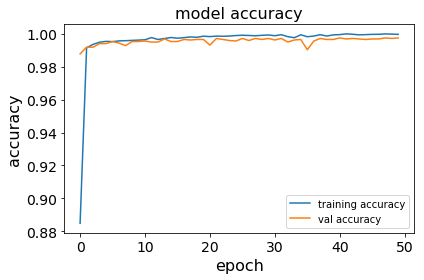

In [5]:
fig, ax = plt.subplots()

ax.plot(history.history['accuracy'],label='training accuracy')
ax.plot(history.history['val_accuracy'],label='val accuracy')

ax.set_title('model accuracy',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('accuracy',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

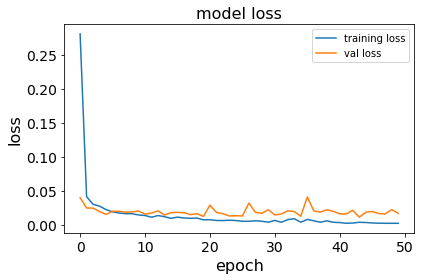

In [6]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'],label='training loss')
ax.plot(history.history['val_loss'],label='val loss')

ax.set_title('model loss',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('loss',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

confusion_matrix
 [[3958    3]
 [  17 4022]]
accuracy:0.9975
precision:0.9992546583850932
recall:0.9957910373854915
f1-score:0.9975198412698413


Text(33.0, 0.5, 'True')

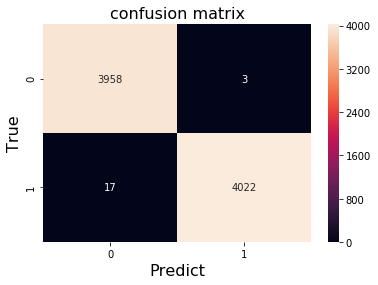

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

y_score = model.predict_classes(x_test)
y_score_1 = model.predict(x_test)

import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_score)
print('confusion_matrix\n', cm)

print('accuracy:{}'.format(accuracy_score(y_test, y_score)))
print('precision:{}'.format(precision_score(y_test, y_score)))
print('recall:{}'.format(recall_score(y_test, y_score)))
print('f1-score:{}'.format(f1_score(y_test, y_score)))

f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='.4g') #画热力图

ax.set_title('confusion matrix',fontsize=16) #标题
ax.set_xlabel('Predict',fontsize=16) #x轴
ax.set_ylabel('True',fontsize=16) #y轴

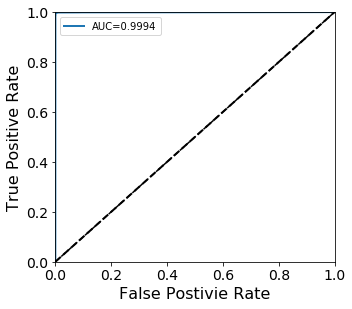

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 4.4))
# AUC值
auc = roc_auc_score(y_test,y_score_1)
# 画ROC曲线
fpr, tpr, thresholds = roc_curve(y_test,y_score_1)   
ax.plot(fpr, tpr, linewidth = 2,label='AUC=%.4f' % auc)
ax.plot([0,1],[0,1], 'k--')


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('False Postivie Rate',{'size':16})
ax.set_ylabel('True Positive Rate',{'size':16})

ax.plot([0,1],[0,1], 'k--',lw=2)

plt.tick_params(labelsize=14)

plt.legend()
plt.tight_layout()
plt.show()

In [9]:
y_score_1

array([[1.0000000e+00],
       [0.0000000e+00],
       [2.9802322e-08],
       ...,
       [0.0000000e+00],
       [5.9604645e-08],
       [1.0000000e+00]], dtype=float32)